# Implementing SHA-256 and Digital Signature (RSA)

# Introduction

This project involves the development of a Python program that combines two essential cryptographic functions: the implementation of the SHA-256 hashing algorithm and the creation of digital signatures using the RSA algorithm. These cryptographic functions are vital for securing data and ensuring the integrity of digital information.

### SHA-256 Hashing Algorithm

The SHA-256 algorithm is a widely used cryptographic hash function that transforms input data, such as text or binary, into a fixed-size output known as the hash value. This hash value is unique to the input data, making it useful for verifying data integrity. In this project, we've implemented the SHA-256 algorithm to hash input messages and create their corresponding hash values.

SHA-256 is commonly used in blockchain technology (e.g., Bitcoin), digital signatures, password hashing, and data verification applications.
It is part of the SHA-2 family, which also includes SHA-224, SHA-256, SHA-384, and SHA-512, each producing hash values of different lengths.



### RSA Digital Signatures

RSA is a widely adopted asymmetric encryption algorithm that uses a pair of public and private keys. One of the essential applications of RSA is creating digital signatures to ensure the authenticity and integrity of messages. Digital signatures are used to verify that a message has not been tampered with and that it was indeed signed by the claimed sender. In this project, we've implemented RSA to create and verify digital signatures.




### SHA-224 and SHA-256 Logical Functions

SHA-224 and SHA-256 cryptographic hash functions employ six logical functions, each operating on 32-bit words, denoted as x, y, and z. These functions produce new 32-bit words as their output.  Below are the descriptions of the logical functions:

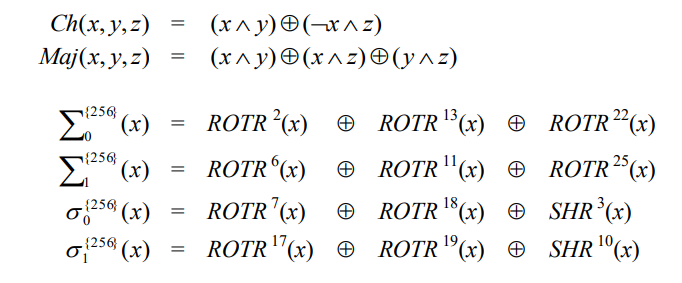



## Constants
### SHA-224 and SHA-256 Constants

SHA-224 and SHA-256 share the same sequence of sixty-four constant 32-bit words, which are derived from the cube roots of the first sixty-four prime numbers.

These constants play a crucial role in the SHA-224 and SHA-256 algorithms and are used throughout the hashing process.

In [1]:
import random
import math
import time  

In [2]:
# Record the start time
start_time = time.time()    

#Constants for the initial hash values (H0, H1, H2, H3, H4, H5, H6, H7) For SHA-256, the initial hash value, H(0), shall consist of the following eight 32-bit words, in hex:
H_0_words = [0x6a09e667, 0xbb67ae85, 0x3c6ef372, 0xa54ff53a, 0x510e527f, 0x9b05688c, 0x1f83d9ab, 0x5be0cd19]

# Function to return a copy of the initial hash values
def H_0():
    """
    SHA-256 uses the same sequence of sixty-four constant 32-bit words
    These words represent the first thirty-two bits of the fractional parts of the cube roots
    of the first sixty-four prime numbers. In hexadecimal notation, these constant words are listed from left
    to right.
    """
    return H_0_words.copy()

In [3]:
# Constants for the message schedule
# These constants are used in the SHA-256 algorithm.
K = bytearray.fromhex('428a2f98 71374491 b5c0fbcf e9b5dba5 3956c25b 59f111f1 923f82a4 ab1c5ed5'
                          'd807aa98 12835b01 243185be 550c7dc3 72be5d74 80deb1fe 9bdc06a7 c19bf174'
                          'e49b69c1 efbe4786 0fc19dc6 240ca1cc 2de92c6f 4a7484aa 5cb0a9dc 76f988da'
                          '983e5152 a831c66d b00327c8 bf597fc7 c6e00bf3 d5a79147 06ca6351 14292967'
                          '27b70a85 2e1b2138 4d2c6dfc 53380d13 650a7354 766a0abb 81c2c92e 92722c85'
                          'a2bfe8a1 a81a664b c24b8b70 c76c51a3 d192e819 d6990624 f40e3585 106aa070'
                          '19a4c116 1e376c08 2748774c 34b0bcb5 391c0cb3 4ed8aa4a 5b9cca4f 682e6ff3'
                          '748f82ee 78a5636f 84c87814 8cc70208 90befffa a4506ceb bef9a3f7 c67178f2'.replace(" ", ""))
# Function to convert a byte array to an integer
def int_from_bytes(x: bytes) -> int:
    return int.from_bytes(x, 'big')

# Create a list of 32-bit integers from the K constants
K_256 = [int_from_bytes(K[i * 4:(i + 1) * 4]) for i in range(len(K) // 4)]


# Preprocessing in SHA-256

Preprocessing is an essential phase in the SHA-256 (Secure Hash Algorithm 256) hashing process. It involves three distinct steps, each designed to prepare the input message for secure and efficient hashing.

## 1. Padding the Message

**Purpose**: To ensure that the message length is a multiple of 512 bits.

- **Appending a '1' Bit**: A single '1' bit is added to the message to mark the end of the data.

- **Zero Bit Padding**: Additional zero bits are added to extend the message length to the nearest multiple of 512 bits. This guarantees that the message's size is a whole number of blocks.

- **Message Length Addition**: The original message length is included in a specific format (usually as an 8-byte big-endian integer) to inform the hash function about the complete message.

## 2. Parsing the Message into Message Blocks

**Purpose**: To organize the message into fixed-size blocks for processing.

- **Block Size**: Each message block is 512 bits (64 bytes) long.

- **Block Structure**: Every block contains 16 32-bit integers, ensuring a consistent format for the input data.

## 3. Setting the Initial Hash Value

**Purpose**: To establish the initial hash values for the SHA-256 algorithm.

- **Constants**: The SHA-256 algorithm uses predefined constants as the initial hash values. These constants are a set of eight 32-bit words.

- **Copy of Constants**: A copy of these initial hash values is created and used as a starting point for the hash computation.

**Preprocessing** in SHA-256 encompasses these three steps and is fundamental to ensuring data integrity, facilitating efficient processing, and initializing the hash function for the SHA-256 algorithm. It prepares the message for secure and reliable hashing.


In [4]:
# Function for padding and parsing the message for SHA-256
def sha_256_pad_and_parse_message(message: bytes) -> [int]:
    """
    Padding the message to a multiple of 512 bits and parsing it into blocks. Create a list of message blocks,
    each block containing 16 32-bit integers Each block is 512 bits or 64 bytes
    Each integer is created from 4 bytes of the message. The function returns a list of blocks,
    each containing 16 integers
    """

# Padding the Message
    l = len(message) * 8                         # Calculate the message length in bits

# Calculate the number of zero bits required to reach the next multiple of 512 bits
    n_zeros = (512 - (l + 64 + 1)) % 512

    message += b'\x80'                           # Append the '1' bit to the message
    message += b'\x00' * ((n_zeros - 7) // 8)    # Append zero bytes to reach the desired length
    message += l.to_bytes(8, 'big')              # Append the original message length as an 8-byte big-endian integer
    assert ((len(message) * 8) % 512 == 0)       # Ensure the message length is a multiple of 512 bits

# Parsing the Message
    block_byte_length = 512 // 8                 # Calculate the number of bytes in a message block (512 bits)
    N = len(message) // block_byte_length        # Calculate the number of message blocks
    word_count = block_byte_length // 4          # Calculate the number of 32-bit words in a block

    message_blocks = []                          # Create a list to store the message blocks
    for i in range(N):                           # Iterate through the message and parse it into blocks
        block_start = i * block_byte_length

# Extract each word and convert it to a 32-bit integer
        message_block = [message[block_start + j * 4:block_start + (j + 1) * 4] for j in range(word_count)]
        message_blocks.append([int_from_bytes(mb) for mb in message_block])

    return message_blocks

## SHA-256 Bitwise Operations

This code section defines a set of bitwise operations and functions used in the SHA-256 (Secure Hash Algorithm 256) hashing process. These operations are crucial for performing bit-level manipulations in the hashing algorithm. Here's a brief overview of the operations and functions:

- **Shift Right (shr)**: The `shr` function performs a right shift operation on an integer by `n` bits, which is a bitwise operation that moves the bits to the right.

- **Rotate Right (rotr)**: The `rotr` function performs a bitwise rotation operation, where `n` bits are rotated to the right. It involves both a right shift and a left shift to achieve the rotation, and the result is bitwise-ANDed with `0xffffffff` to ensure it stays within a 32-bit integer.

- **Specific Bitwise Operations (Sig_0, Sig_1, sig_0, sig_1)**: These functions combine bitwise rotations (rotr) with different shift values and XOR operations. They play key roles in the SHA-256 algorithm for data transformation.

- **Ch and Maj Functions**: These functions, part of the SHA-256 algorithm, combine their input values using bitwise AND and XOR operations. They are essential for data manipulation and mixing.

- **SHA-256 Hash Computation**: This code also provides a glimpse into the SHA-256 hashing process, including message preprocessing (padding, parsing, and initial hash value setup) and the actual hash computation. It involves creating a message schedule, initializing working variables, and performing bitwise operations for each block of the message.

In [5]:
def shr(x: int, n: int) -> int:
    """
        # shr is a function that performs a right shift operation on the integer x by n bits.
        # It's a bitwise operation that moves the bits to the right by n positions
    """
    return x >> n

def rotr(x: int, n: int) -> int:
    """
        # rotr stands for "rotate right." It performs a bitwise rotation operation on x,
        # where n bits are rotated to the right. It involves both a right shift and a left shift
        to achieve the rotation,
        # and the result is bitwise-ANDed with 0xffffffff to ensure it stays within a 32-bit integer.
        """
    return (x >> n) | (x << (32 - n)) & 0xffffffff

# a specific bitwise operation that involves three rotations (rotr) with different shift values and XOR operations.
def Sig_0(x: int) -> int:
    return rotr(x, 2) ^ rotr(x, 13) ^ rotr(x, 22)

def Sig_1(x: int) -> int:
    return rotr(x, 6) ^ rotr(x, 11) ^ rotr(x, 25)

def sig_0(x: int) -> int:
    return rotr(x, 7) ^ rotr(x, 18) ^ shr(x, 3)

def sig_1(x: int) -> int:
    return rotr(x, 17) ^ rotr(x, 19) ^ shr(x, 10)

# Ch is the "choose" function, part of the SHA-256 algorithm.
# It combines its input values using bitwise AND and XOR operations.
def Ch(x, y, z):
    return (x & y) ^ (~x & z)

# Maj is the "majority" function, also part of the SHA-256 algorithm.
# It combines its input values using bitwise AND and XOR operations.
def Maj(x, y, z):
    return (x & y) ^ (x & z) ^ (y & z)

def sha_256(message: bytes) -> bytes:

# Preprocessing
    """
    preprocessing consist of 3 steps:==>    1. padding the message 2.parsing the message into message blocks
    3.setting the initial hash value
    """
    H = H_0()
    message_blocks = sha_256_pad_and_parse_message(message)

# Hash computation
    N = len(message_blocks)
    for i in range(1, N + 1):

# Prepare the message schedule
        W = [message_blocks[i - 1][t] for t in range(16)]

        for t in range(16, 64):
            W.append((sig_1(W[t - 2]) + W[t - 7] + sig_0(W[t - 15]) + W[t - 16]) & 0xffffffff)

# Initialize working variables
        a, b, c, d, e, f, g, h = H[0], H[1], H[2], H[3], H[4], H[5], H[6], H[7]

# Shuffle
        for t in range(64):
            T_1 = (h + Sig_1(e) + Ch(e, f, g) + K_256[t] + W[t]) & 0xffffffff
            T_2 = (Sig_0(a) + Maj(a, b, c)) & 0xffffffff
            h = g
            g = f
            f = e
            e = (d + T_1) & 0xffffffff
            d = c
            c = b
            b = a
            a = (T_1 + T_2) & 0xffffffff

# New intermediate hash values
        H[0] += a
        H[1] += b
        H[2] += c
        H[3] += d
        H[4] += e
        H[5] += f
        H[6] += g
        H[7] += h
        H = [h & 0xffffffff for h in H]

    return b''.join([h.to_bytes(4, 'big') for h in H])

    return sha_256(message)

## RSA (Rivest–Shamir–Adleman)

**RSA (Rivest–Shamir–Adleman)** is a widely used public-key cryptosystem for secure data communication and digital signatures. It's named after its inventors: Ron Rivest, Adi Shamir, and Leonard Adleman. RSA relies on the mathematical properties of large prime numbers for its security.


The security of RSA relies on the difficulty of factoring the modulus "n" back into its prime factors "p" and "q." This makes it computationally infeasible for an attacker to determine the private key from the public key. RSA keys are used for encrypting data (with the public key) and decrypting it (with the private key), as well as for digital signatures.

## Practical Issues in RSA

### 1. Finding Two Large Prime Numbers (Key Generation)

- **Efficiency:** Generating large primes is computationally intensive.
- **Randomness Requirement:** True randomness is crucial.
- **Prime Pair Equality:** Ensuring 'p' is not equal to 'q' is critical.

### 2. Exponentiation of Large Numbers

- **Computational Complexity:** Efficient modular exponentiation is essential.
- **Key Size Impact:** Larger keys increase computational costs.
- **Choice of Exponents:** Careful selection to avoid vulnerabilities.
- **Implementation Vulnerabilities:** Robust implementation is crucial.




In this code, we have implemented key generation for the RSA cryptosystem, a widely used public-key cryptography algorithm. The process involves generating public and private keys using large prime numbers.

## Extended Euclidean Algorithm for Modular Inverse

We defined two important functions:

### 1. `gcd_extended(a, b)`

This function calculates the greatest common divisor (GCD) of two numbers `a` and `b`. The result is a tuple `(g, x, y)` where:
- `g` is the GCD of `a` and `b`.
- `x` and `y` are integers such that `ax + by = g`.

### 2. `mod_inverse(a, m)`

This function computes the modular inverse of `a` modulo `m`. It uses the `gcd_extended` function to find the GCD of `a` and `m` and applies the Extended Euclidean Algorithm to determine `x` such that `ax + my = 1`. The result is returned as `x % m`.

These functions are crucial for RSA key generation.

In [6]:
def gcd_extended(a, b):
    if a == 0:                                   # Base case: if a is zero, return b as gcd, x as 0, and y as 1.
        return b, 0, 1
    else:
        g, x, y = gcd_extended(b % a, a)         # Recursive call with swapped arguments and modulo operation.
        return g, y - (b // a) * x, x            # Return gcd, coefficients y - (b // a) * x, and x.


In [7]:
def mod_inverse(a, m):
    g, x, _ = gcd_extended(a, m)                 # Calculate the extended GCD of 'a' and 'm'
    
    if g != 1:                                   # Check if 'a' and 'm' are coprime (greatest common divisor is 1)
        raise ValueError("The modular inverse does not exist") # If not,modular inverse does not exist
    else:
        return x % m                             # Return the modular inverse of 'a' modulo 'm'

## Miller-Rabin Primality Test

To generate large prime numbers efficiently, we implemented the Miller-Rabin primality test. This probabilistic algorithm checks if a number is likely prime. The `is_prime_miller_rabin` function takes a number `n` and an optional parameter `k` representing the number of iterations. A higher `k` value increases accuracy at the cost of performance.

## Pros

1. **Efficiency:**
   - Fast for large numbers.

2. **Flexibility:**
   - Trade-off between accuracy and speed.

3. **Randomized:**
   - Introduces randomness.

4. **Large Number Handling:**
   - Suitable for cryptographic applications.

## Cons

1. **Probabilistic:**
   - Can produce false positives.

2. **Carmichael Numbers:**
   - May misclassify Carmichael numbers.

3. **Deterministic Alternatives:**
   - Deterministic tests provide certainty.

4. **Witness Dependence:**
   - Correctness depends on chosen witnesses.

In [8]:
def is_prime_miller_rabin(n, k=3):   # Lower number of iterations (faster but less accurate)
    if n <= 1:                       # Check if 'n' is less than or equal to 1
        return False
    if n <= 3:                       # Check if 'n' is less than or equal to 3
        return True

    if n % 2 == 0:                   # Check if 'n' is even
        return False
    
    r, d = 0, n - 1                  # Initialize variables for the decomposition of (n - 1) into 2^r * d

    while d % 2 == 0:                # Decompose (n - 1) into 2^r * d
        r += 1
        d //= 2

    # Perform the Miller-Rabin primality test with 'k' iterations
    for _ in range(k):               # Fewer iterations for faster execution
        a = random.randint(2, n - 2) # Choose a random integer 'a' from the range [2, n - 2]
        x = pow(a, d, n)             # Compute x = a^d mod n

        # Check if 'x' is 1 or n - 1, and continue to the next iteration if true
        if x == 1 or x == n - 1:
            continue

        # Repeat the squaring step 'r - 1' times
        for _ in range(r - 1):
            x = pow(x, 2, n)
            
            # If x is equal to n - 1, break out of the loop
            if x == n - 1:
                break
        else:
            # If the loop completes without finding x == n - 1, 'n' is composite
            return False

    # If 'k' iterations pass without finding a witness, 'n' is likely prime
    return True


# Generating Large Prime Numbers

## Function Overview

The `generate_large_prime(bits, k=5)` function is responsible for generating large prime numbers, a crucial step in cryptographic applications. Here's a breakdown of its functionality:

- **Bits (bits):**
  - The 'bits' parameter determines the bit length of the generated prime number, influencing its size and security.

- **Iterations (k):**
  - The 'k' parameter (default: 5) controls the number of iterations in the Miller-Rabin primality test. A lower 'k' value results in faster execution but lower accuracy.

- **Prime Candidate Generation:**
  - A candidate prime number is created by generating random bits and setting the highest and lowest bits to 1, ensuring an odd number.

- **Primality Test:**
  - The candidate is subjected to the Miller-Rabin primality test using the `is_prime_miller_rabin(candidate, k)` function.

- **Loop:**
  - The function loops until a prime candidate is identified, ensuring the reliability of the generated prime numbers.

- **Output:**
  - Returns the generated large prime number meeting the specified bit length and primality criteria.


### Why Generating RSA Keys Matters

Generating RSA keys is a fundamental step in setting up secure communication and data protection in various applications, including secure messaging, e-commerce, and more.

In [9]:
def generate_large_prime(bits, k=5):  # Lower number of iterations 
    while True:
        candidate = random.getrandbits(bits)
        candidate |= (1 << bits - 1) | 1

        if is_prime_miller_rabin(candidate, k):
            return candidate

# Generating RSA Public and Private Keys

## Function Overview

The `generate_rsa_keys(bits=2048)` function is designed to generate RSA public and private keys. Here's how it works:

- **Key Length (bits):**
  The parameter 'bits' (default: 2048) represents the desired key length, typically set to 2048 bits for security.

- **Prime Number Generation:**
  The function enters a loop to generate two large prime numbers, 'p' and 'q,' using the `generate_large_prime(bits)` function. It ensures 'p' and 'q' are distinct.

- **Modulus and Euler's Totient:**
  The modulus 'n' is calculated by multiplying 'p' and 'q.' The Euler's totient function, phi_n, is computed as (p-1)(q-1).

- **Exponents:**
  - **Public Exponent 'e':**
    Set to a common value, 65537.
  - **Private Exponent 'd':**
    Calculated using the modular inverse function `mod_inverse(e, phi_n)`.

- **Validation:**
  The loop ensures 'p' and 'q' are not equal, a crucial condition for key generation.

- **Output:**
  Returns the public exponent 'e,' private exponent 'd,' and modulus 'n,' forming the RSA key pair.


In [10]:
def generate_rsa_keys(bits=2048):
    while True:
        # Generate two large prime numbers 'p' and 'q'
        p = generate_large_prime(bits)
        q = generate_large_prime(bits)

        if p != q:
            break

    n = p * q
    phi_n = (p - 1) * (q - 1)
    e = 65537
    d = mod_inverse(e, phi_n)

    return e, d, n

# Digital Signature Functions 

 `sign_message` and `verify_signature`. These functions are integral components of a digital signature system, enhancing data integrity and source authentication.

## 1. `sign_message` Function

**Purpose**: Generates a digital signature for a given message.

**Parameters**: `message`, `private_key`, and `n`.

**Operation**:
- Calculates the SHA-256 hash of the message, ensuring data integrity.
- Converts the hash to an integer for mathematical operations.
- Performs modular exponentiation with the private key and modulus.

**Output**: Returns the computed digital signature.

## 2. `verify_signature` Function

**Purpose**: Validates the authenticity of a message and its digital signature.

**Parameters**: `message`, `signature`, `public_key`, and `n`.

**Operation**:
- Decodes the signature using the public key and modulus.
- Computes the SHA-256 hash of the input message.
- Compares the decoded signature with the computed hash.

**Output**: Returns `True` for a valid signature and `False` for an invalid one.

## Significance

Digital signatures are pivotal for secure data transmission and verification. These functions play a critical role in various applications, ensuring data integrity and source verification. Their implementation is vital for secure communication and trustworthy data handling.

In [11]:
class SignatureHandler:
    def __init__(self, private_key, public_key, n):
        self.private_key = private_key
        self.public_key = public_key
        self.n = n

    def sign_message(self, message):
        sha256_hash = sha_256(message.encode())
        signature = pow(int.from_bytes(sha256_hash, byteorder='big'), self.private_key, self.n)
        return signature

    def verify_signature(self, message, signature):
        decrypted_message_encoded = pow(signature, self.public_key, self.n)
        sha256_hash = int.from_bytes(sha_256(message.encode()), byteorder='big')
        return decrypted_message_encoded == sha256_hash

## RSA Key Generation and Key Display

This code snippet defines the main function for RSA key generation and key display. It also checks whether the script is being run directly.

### Function Overview

The `main()` function serves as the entry point for generating RSA keys and displaying key information.

- `global d, n, e`: This line declares `d`, `n`, and `e` as global variables. These variables will store the RSA public and private keys generated.

- `bits = 2048`: The desired key length, in bits, is set to 2048, which is a common choice for strong security.

- The `generate_rsa_keys(bits)` function is called to generate the RSA public and private keys. The generated keys include the public exponent 'e,' private exponent 'd,' and modulus 'n.'


- The `if __name__ == "__main__":` block ensures that the code is executed only when the script is run directly (not when it's imported as a module).


This part of the code performs key generation and display, which is a critical step in setting up secure communication and data protection using RSA encryption. The public and private keys are essential for encrypting and decrypting data and ensuring secure communication in various applications, including secure messaging and e-commerce.


In [12]:
# Define the main function
def main():
    global d, n, e  # Declare 'd','n','e' as global variables
    bits = 2048
    e, d, n = generate_rsa_keys(bits)

    # Print the public key (e), private key (d), and modulus (n)
    print("Public Key (e):", e)
    print("Length of e (in bits):", e.bit_length())
    print("Private Key (d):", d)
    print("Length of d (in bits):", d.bit_length())
    print("n:", n)
    print("Length of n (in bits):", n.bit_length())

# Check if the script is being run directly (not imported as a module)
if __name__ == "__main__":
    main()

Public Key (e): 65537
Length of e (in bits): 17
Private Key (d): 45261847488347897687157286209595017006898202320849989487898866994790459351966173107987210909269220731625349665303824318976504241096439246623610390418028536334314088169605005021755491813159034968731160802458681020095856079011089612322100452885732015482539802283542169390667302138587135929731128908667823198107545221466450087812465835907739012545817720590367736162643297517931393232776234767018370456324288492740635051877785577925252808400847723038783593520954583254547858141325714039682418780929814103411909954056840066546866984734505048451057799817830592719465598221382945618794315274153061424143348640299779769145018148911199726198604927830433998181219855683913785223417255566052919615216298483650096200424808945162887008240254943745820251251191238997449665095664582922472687092639015481728949792293947181375534395588653187534445926855091748117244519003013695850486197265708411844952422174448323623968102307785618725078309084750781501

## Message Hashing, Signing, and Verification in RSA

### Message Hashing

- The message "Hello World" is hashed using SHA-256.
- The resulting SHA-256 hash is displayed, along with its length.

### Signature Generation and Verification

- A SignatureHandler instance is created with the private and public keys.
- The message is signed using the private key, producing a signature.
- The signature is verified using the public key.
- If the verification is successful, "Signature is valid" is printed; otherwise, "Signature is not valid" is printed.

### Message Encoding and Encryption

- The message is encoded into a list of ASCII values.
- Each ASCII value is encrypted using the public key and displayed as ciphertext.

### Decryption and Decoded Message

- The ciphertext is decrypted using the private key.
- The decrypted ASCII values are converted back to characters.
- The decrypted SHA-256 hash is displayed.


In [13]:
# Message to be hashed and encrypted
message = "Hello World"

# Hash the message using SHA-256
sha256_hashed = sha_256(message.encode())

# Display the SHA-256 hash
print("SHA-256 Hash: ", sha256_hashed.hex())
print("length of sha256 is:", len(sha256_hashed.hex()))
print("----------------------------------------------------------------------------------")

# Sign the message using the private key
signature_handler = SignatureHandler(d, e, n)
signature = signature_handler.sign_message(message)
print("Signature: ", signature)

print("----------------------------------------------------------------------------------")

# Verify the signature using the public key
is_valid_signature = signature_handler.verify_signature(message, signature)
if is_valid_signature:
    print("Signature is valid.")
else:
    print("Signature is not valid.")
    
    
print("----------------------------------------------------------------------------------")

# Encode the message and encrypt it
message_encoded = [ord(ch) for ch in message]
ciphertext = [pow(ch, e, n) for ch in message_encoded]  # pow(ch, e, n) == ch^e mod n

print("Ciphertext: ", ciphertext)

# Decrypt and convert back
message_encoded = [pow(ch, d, n) for ch in ciphertext]
decrypted_message = "".join(chr(ch) for ch in message_encoded)

# Display the decrypted SHA-256 hash
print("Decrypted SHA-256 Hash: ", decrypted_message)
print("*******************************************************")
print("                                                       ")
print("                                                       ")


SHA-256 Hash:  a591a6d40bf420404a011733cfb7b190d62c65bf0bcda32b57b277d9ad9f146e
length of sha256 is: 64
----------------------------------------------------------------------------------
Signature:  185452238898777236685925608289800510288411982180244408052973846848372862712761521713368495467459900874212630929018423398013012154619697443873284819672398451194028851954903500070094869138346860370744494631406047217305090720741751497645257332869109314643880091494053361892485673420428960510073854236167488618132324867271407103924920801297556954991137025103009139031736890974129720375157919999892698111984796612556540866993202009193565895913563949778517533571206151129109475038123358278813085269190104350250965151044945670395859883784695218087825962996843962908602994846555158020584466281732366858771678117957773009787154656560037037676033332261583207939832773173095162587342614403894867135102381935225457800716324671379774298099885169985626019244444990096124201535095663698303355764098020384961779888173

## This part is only for checking different parts of the code:

In [14]:
# Encrypt and decrypt a message to check the private key
message = "Hello World"
message_encoded = [ord(ch) for ch in message]
ciphertext = [pow(ch, e, n) for ch in message_encoded]
decrypted_message_encoded = [pow(ch, d, n) for ch in ciphertext]
decrypted_message = "".join(chr(ch) for ch in decrypted_message_encoded)
if decrypted_message == message:
    print("Private key (d) is working for decryption.")
else:
    print("Private key (d) is not working for decryption. Check your key generation.")

Private key (d) is working for decryption.


In [15]:
# Sign and verify a message to check the signature process
signature = signature_handler.sign_message(message)
is_valid_signature = signature_handler.verify_signature(message, signature)
if is_valid_signature:
    print("Signature is valid.")
else:
    print("Signature is not valid. Check your signing and verification process.")

Signature is valid.


In [16]:
# Test the sha256 function
sample_message = b"Hello World"
# The expected SHA-256 hash for "Hello World"
expected_hash = "a591a6d40bf420404a011733cfb7b190d62c65bf0bcda32b57b277d9ad9f146e"

# Call your sha256 function and compare the result to the expected hash
result = sha_256(sample_message)
result_hex = result.hex()

if result_hex == expected_hash:
    print("sha256 function is working correctly.")
else:
    print("sha256 function is not working as expected. Result:", result_hex)




sha256 function is working correctly.


## Measuring Execution Time

This code snippet records the execution time of the entire operation and prints it for reference.


### Purpose of Measuring Execution Time

Measuring execution time is a crucial practice in software development. It helps in optimizing and improving the performance of code. By measuring the time taken for an operation, you can identify bottlenecks and make necessary improvements for efficiency. It's particularly useful when dealing with time-critical tasks or evaluating the efficiency of algorithms or processes.

In [17]:
# Record the end time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time of the whole operation:", execution_time, "seconds")

Execution time of the whole operation: 33.2553026676178 seconds


## Conclusion

The successful implementation of the SHA-256 hashing algorithm and RSA digital signatures in this project underscores the importance of cryptography in ensuring the security and integrity of digital communications. With this program, you can hash messages using SHA-256 and create digital signatures to verify the authenticity and integrity of messages. These cryptographic techniques play a crucial role in various applications, including data security, secure communication, and digital certificates.